In [71]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [72]:
global Scale,AbunMatrix,Eta,Connec,Kappa,Abun0,mu0,mu1,D

In [73]:
def Arr2Posi(num,y):
    a=np.mod(y,num)
    b=int((y-a)/num)
    return [a,b]

In [74]:
def Posi2Arr(num,a,b):
    return a+b*num

In [75]:
def Dis(num,x,index):
    y=np.zeros(len(x))
    AA=Arr2Posi(num,index)
    for i in range(len(x)):
        BB=Arr2Posi(num,x[i])
        y[i]=np.sqrt((AA[0]-BB[0])**2+(AA[1]-BB[1])**2)
    return y

In [76]:
def Nearby(num,y):
    A=[]
    [a,b]=Arr2Posi(num,y)
    if a>0:
        A.append(Posi2Arr(num,a-1,b))
    if a<num-1:
        A.append(Posi2Arr(num,a+1,b))
    if b>0:
        A.append(Posi2Arr(num,a,b-1))
    if b<num-1:
        A.append(Posi2Arr(num,a,b+1))
    return A

In [77]:
def ARG_Move(t,y):
    dydt=np.zeros((Scale**2)*2)
    for i in range(Scale**2):
        aa=Arr2Posi(Scale,i)
        bb=Nearby(Scale,i)
        ss0=0
        ss1=0
        for j in range(len(bb)):
            ss0=ss0+y[bb[j]]
            ss1=ss1+y[bb[j]+Scale**2]
        if AbunMatrix[aa[0],aa[1]]==0:
            dydt[i]=0
            dydt[i+Scale**2]=0
        else:
            dydt[i]=mu0*y[i]*(1-(y[i]+y[i+Scale**2])/AbunMatrix[aa[0],aa[1]])-Eta*y[i]*(y[i+Scale**2]+Connec*ss1)+Kappa*y[i+Scale**2]-D*y[i]
            dydt[i+Scale**2]=mu1*y[i+Scale**2]*(1-(y[i]+y[i+Scale**2])/AbunMatrix[aa[0],aa[1]])+Eta*y[i]*(y[i+Scale**2]+Connec*ss1)-Kappa*y[i+Scale**2]-D*y[i+Scale**2]
    return dydt

13
0.6462740646822414
14
0.8963563062335357
4
0.9534749816409326
4
0.17586599827922536
2
0.031137352639019882
13
0.2655828251918976
8
0.05317068269081721
16
0.6558638492327811
13
0.13464366346525622
9
0.5344765737739103
15
0.2538353656735552
15
0.8723791626226554
7
0.5627201325005844
6
0.6831068878849699
7
0.04198363220003997
13
0.12551161924981247


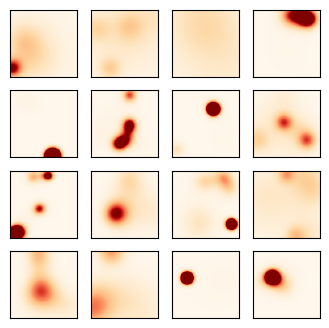

In [78]:
Scale=51
plt.figure(figsize=(4,4))
for fgh in range(16):
    NumPeak=int(np.random.rand()*Scale/3)+1
    LocationPeak=np.zeros((2,NumPeak))
    for i in range(NumPeak):
        LocationPeak[0,i]=int(np.random.rand()*Scale)
        LocationPeak[1,i]=int(np.random.rand()*Scale)
    VarPeak=np.zeros(NumPeak)
    for i in range(NumPeak):
        VarPeak[i]=np.random.rand()*Scale/2+3
    print(NumPeak)
    land=np.zeros((Scale,Scale))
    for i in range(Scale):
        for j in range(Scale):
            for k in range(NumPeak):
                DD=np.sqrt((i-LocationPeak[0,k])**2+(j-LocationPeak[1,k])**2)
                land[i,j]=land[i,j]+np.exp(-DD**2/(2*VarPeak[k]**2))/(2*np.pi*VarPeak[k]**2)
    land=land**(int(np.random.rand()*4)+1)
    AbunMatrix=land/np.sum(land)*Scale**2

    land_p=[]
    for x in AbunMatrix.flatten():
        if x>0:
            land_p.append(x)
        temp=land_p/np.sum(land_p)
    Entropy=np.exp(sum(-temp*np.log(temp)))/Scale/Scale
    print(Entropy)
    plt.subplot(4,4,fgh+1)
    plt.imshow(AbunMatrix, cmap='OrRd')
    plt.clim(0,7)
    plt.xticks([])
    plt.yticks([])
plt.savefig('GaussianPatches_1.pdf')
plt.show()

In [79]:
Scale=51
NUM=200
Entropy=np.zeros(NUM)
Plasmid=np.zeros(NUM)

Eta=0.05
Connec=0.04
Kappa=0.01
Abun0=0.01
mu0=0.5
mu1=0.45
D=0.02
Center=int((Scale-1)/2)
InitialM=np.zeros((Scale,Scale))
InitialM[Center,Center]=Abun0*AbunMatrix[Center,Center]
#for i in range(Scale):
    #for i in range(Scale):
        #InitialM[i,j]=Abun0*AbunMatrix[i,j]
Initial=np.concatenate((AbunMatrix.flatten(),InitialM.flatten()),axis=0)
timespan=np.arange(0,500,1)

for fgh in range(NUM):
    print(fgh)
    NumPeak=int(np.random.rand()*Scale/3)+1
    LocationPeak=np.zeros((2,NumPeak))
    for i in range(NumPeak):
        LocationPeak[0,i]=int(np.random.rand()*Scale)
        LocationPeak[1,i]=int(np.random.rand()*Scale)
    VarPeak=np.zeros(NumPeak)
    for i in range(NumPeak):
        VarPeak[i]=np.random.rand()*Scale/2+3
    land=np.zeros((Scale,Scale))
    for i in range(Scale):
        for j in range(Scale):
            for k in range(NumPeak):
                DD=np.sqrt((i-LocationPeak[0,k])**2+(j-LocationPeak[1,k])**2)
                land[i,j]=land[i,j]+np.exp(-DD**2/(2*VarPeak[k]**2))/(2*np.pi*VarPeak[k]**2)
    land=(land)**(int(np.random.rand()*4)+1)
    AbunMatrix=land/np.sum(land)*Scale**2

    land_p=[]
    for x in AbunMatrix.flatten():
        if x>0:
            land_p.append(x)
        temp=land_p/np.sum(land_p)
    Entropy[fgh]=np.exp(sum(-temp*np.log(temp)))/Scale/Scale
    sol=solve_ivp(ARG_Move,[0,max(timespan)],Initial,method='RK23',t_eval=timespan)
    y1=sol.y
    Plasmid[fgh]=np.mean(y1[np.arange(Scale**2,(Scale**2)*2,1),-1])/(np.mean(y1[np.arange(0,Scale**2,1),-1])+np.mean(y1[np.arange(Scale**2,(Scale**2)*2,1),-1]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169


c:\Users\tengw\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\integrate\_ivp\common.py:114: RuntimeWarning: invalid value encountered in scalar divide
  d2 = norm((f1 - f0) / scale) / h0


170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


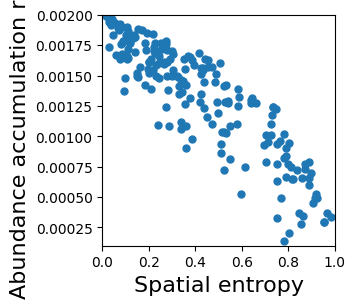

In [81]:
plt.figure(figsize=(3,3))
plt.plot(Entropy,Plasmid/max(timespan),'.',markersize=10)
plt.xlabel('Spatial entropy',fontsize=16)
plt.ylabel('Abundance accumulation rate',fontsize=16)
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(0,1)
plt.ylim(0.0001,0.002)
plt.savefig('GaussianPatches_2.pdf')
plt.show()

import pandas as pd
df1=pd.DataFrame(Entropy)
df1.to_csv("GaussianPatches_1.csv")
df2=pd.DataFrame(Plasmid)
df2.to_csv("GaussianPatches_2.csv")